# Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set = sc.fit_transform(training_set)

In [4]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [5]:
X_train = np.reshape(X_train, (1257,1,1))

# Building the RNN

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [7]:
# Initialising the RNN
regressor = Sequential()

In [8]:
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [9]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [10]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
1257/1257 [==============================] - 3s 2ms/step - loss: 0.1467
Epoch 2/200
1257/1257 [==============================] - 0s 239us/step - loss: 0.1062
Epoch 3/200
1257/1257 [==============================] - 0s 256us/step - loss: 0.0868
Epoch 4/200
1257/1257 [==============================] - 1s 555us/step - loss: 0.0786
Epoch 5/200
1257/1257 [==============================] - 0s 319us/step - loss: 0.0754
Epoch 6/200
1257/1257 [==============================] - 0s 261us/step - loss: 0.0734
Epoch 7/200
1257/1257 [==============================] - 1s 530us/step - loss: 0.0718
Epoch 8/200
1257/1257 [==============================] - 1s 403us/step - loss: 0.0702
Epoch 9/200
1257/1257 [==============================] - 0s 263us/step - loss: 0.0685
Epoch 10/200
1257/1257 [==============================] - 0s 251us/step - loss: 0.0669
Epoch 11/200
1257/1257 [==============================] - 0s 254us/step - loss: 0.0651
Epoch 12/200
1257/1257 [==============================

1257/1257 [==============================] - 0s 283us/step - loss: 2.5228e-04
Epoch 94/200
1257/1257 [==============================] - 0s 248us/step - loss: 2.5279e-04
Epoch 95/200
1257/1257 [==============================] - 0s 260us/step - loss: 2.5127e-04
Epoch 96/200
1257/1257 [==============================] - 0s 249us/step - loss: 2.5241e-04
Epoch 97/200
1257/1257 [==============================] - 0s 246us/step - loss: 2.5283e-04
Epoch 98/200
1257/1257 [==============================] - 0s 268us/step - loss: 2.5166e-04
Epoch 99/200
1257/1257 [==============================] - 0s 255us/step - loss: 2.5119e-04
Epoch 100/200
1257/1257 [==============================] - 0s 274us/step - loss: 2.5053e-04
Epoch 101/200
1257/1257 [==============================] - 0s 273us/step - loss: 2.5305e-04
Epoch 102/200
1257/1257 [==============================] - 0s 244us/step - loss: 2.5038e-04
Epoch 103/200
1257/1257 [==============================] - 0s 267us/step - loss: 2.5269e-04
Epoch 10

1257/1257 [==============================] - 0s 333us/step - loss: 2.4727e-04
Epoch 183/200
1257/1257 [==============================] - 0s 293us/step - loss: 2.5229e-04
Epoch 184/200
1257/1257 [==============================] - 0s 276us/step - loss: 2.4689e-04
Epoch 185/200
1257/1257 [==============================] - 0s 254us/step - loss: 2.4680e-04
Epoch 186/200
1257/1257 [==============================] - 0s 253us/step - loss: 2.4714e-04
Epoch 187/200
1257/1257 [==============================] - 0s 238us/step - loss: 2.4980e-04
Epoch 188/200
1257/1257 [==============================] - 0s 255us/step - loss: 2.5071e-04
Epoch 189/200
1257/1257 [==============================] - 0s 309us/step - loss: 2.4954e-04
Epoch 190/200
1257/1257 [==============================] - 0s 278us/step - loss: 2.5150e-04
Epoch 191/200
1257/1257 [==============================] - 0s 274us/step - loss: 2.4977e-04
Epoch 192/200
1257/1257 [==============================] - 0s 346us/step - loss: 2.4878e-04
Ep

In [12]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
inputs=real_stock_price
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,(20,1,1))
predicted_stock_price=regressor.predict(inputs)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

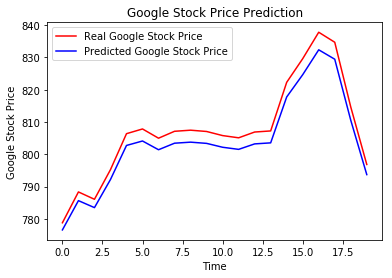

In [14]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

***